# [Detekcja pojazdów](https://www.kaggle.com/datasets/ashfakyeafi/road-vehicle-images-dataset)
Użyteczne linki:  
[Exploring your image datasets the right way](https://raychunyin00.medium.com/computer-vision-exploring-your-image-datasets-the-right-way-538c5ae8ca5d)


# Opis problemu i danych
Problem - detekcja pojazdów na obrazie  
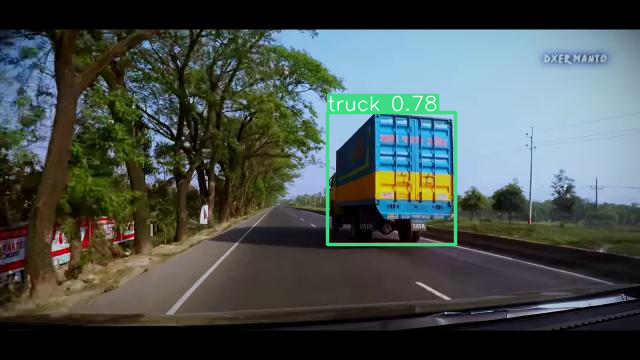

In [54]:
import os
import random

import cv2

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
train_images = "archive/trafic_data/train/images"
train_labels = "archive/trafic_data/train/labels"

## Wizualizacja danych treningowych - *zdjęć z labelami*

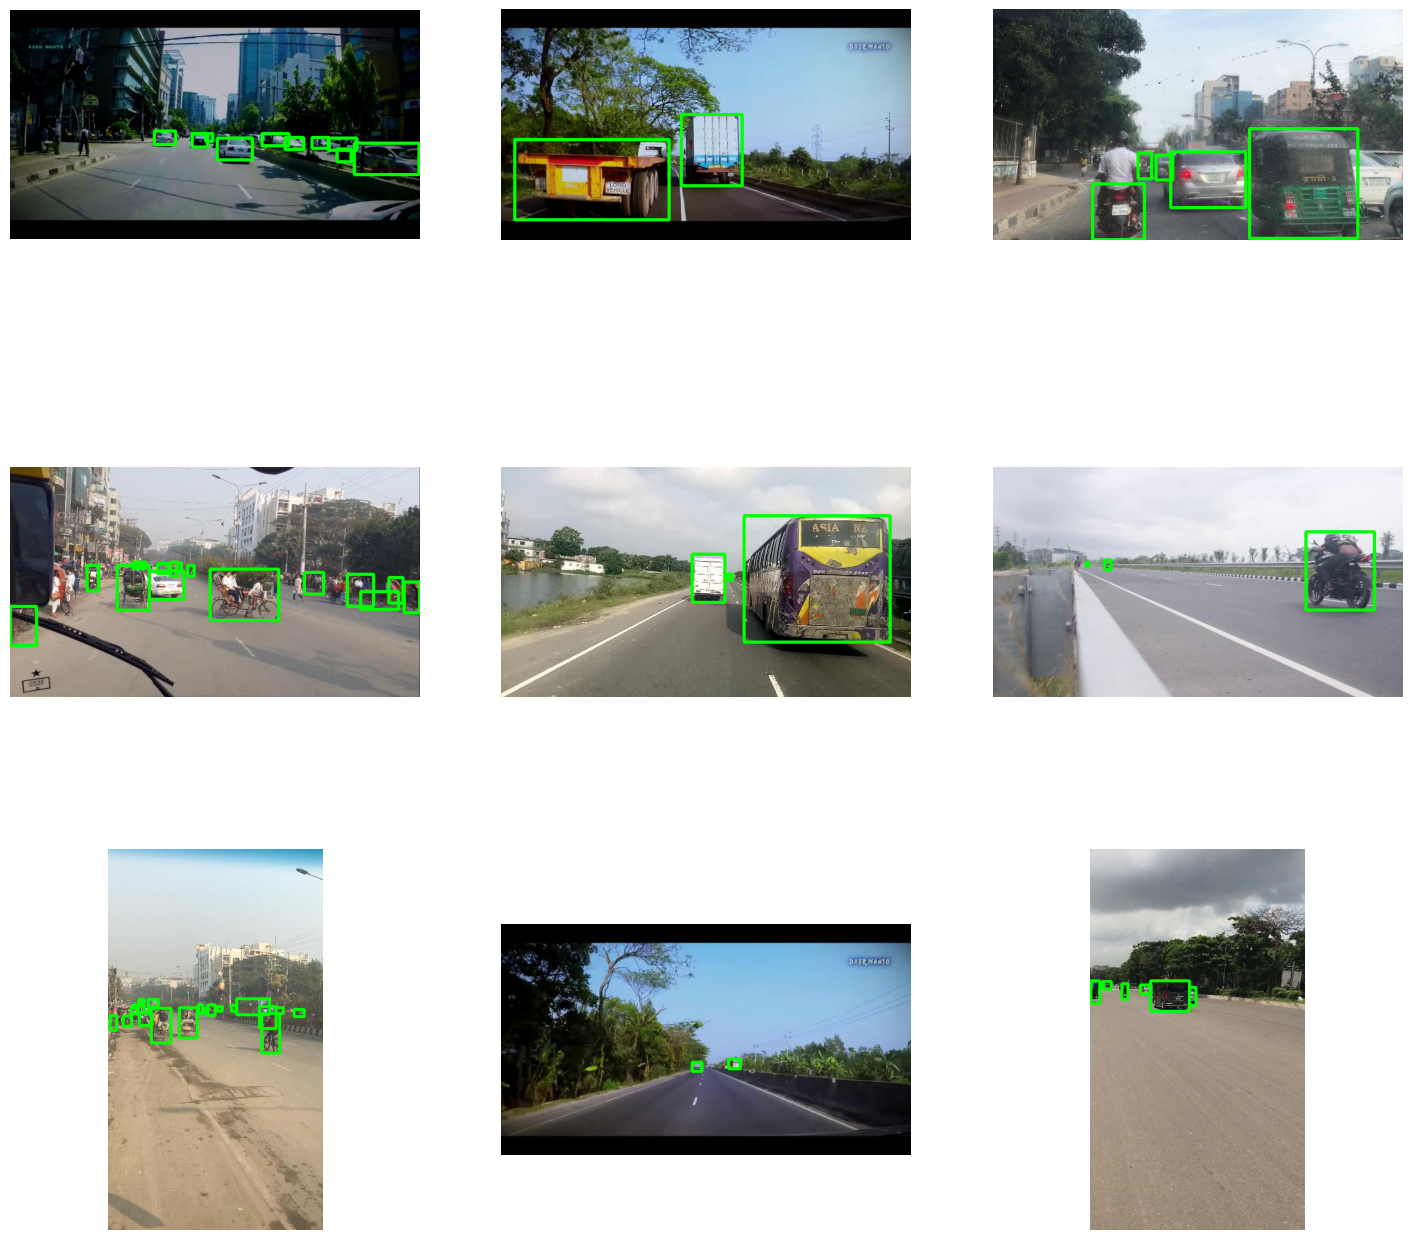

In [42]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    return labels

def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')

image_files = os.listdir(train_images)
random_images = random.sample(image_files, 9)

fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row, col = divmod(i, 3)
    
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    labels = load_labels(image_file, train_labels)

    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [5]:
with open('archive/trafic_data/data_1.yaml', 'r') as f:
    
    data = f.read()
    
print(data)

train: ../train/images
val: ../valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


In [6]:
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x360 and 3 channels.


In [7]:
print(f"Długość zbioru: {len(image_files)}")

Długość zbioru: 2704


In [8]:
shapes_df = pd.DataFrame()
heights = []
widths = []
channels = []
for i, image_file in enumerate(image_files):
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    
    shape = image.shape
    heights.append(shape[0])
    widths.append(shape[1])
    channels.append(shape[2])

shapes_df['width'] = widths
shapes_df['height'] = heights
shapes_df['channel'] = channels
    

In [9]:
print(f"""Unique (Width, Height, Channel) values: {
    len(shapes_df['width'].unique()),
    len(shapes_df['height'].unique()),
    len(shapes_df['channel'].unique())
    }""")

Unique (Width, Height, Channel) values: (73, 200, 1)


In [10]:
print(f"""Unikalne kombinacje: {
    len(shapes_df[['width', 'height', 'channel']].drop_duplicates())
    }""")

Unikalne kombinacje: 270


In [11]:
shapes_df.value_counts()[:5]

width  height  channel
640    360     3          1510
360    640     3           274
480    640     3           138
640    359     3           132
       362     3            85
Name: count, dtype: int64

Widać, że najpopularniejsza kombinacja to 640x360 i vice versa.

In [12]:
# treating WxH as HxW
most_popular_shape = shapes_df.value_counts()[:2]
print(f"% zbioru jaki ma najpopularniejsza ({most_popular_shape[:1].index.names}) rozdzielczość: {most_popular_shape.sum()/len(shapes_df)*100:.2f} %")

% zbioru jaki ma najpopularniejsza (['width', 'height', 'channel']) rozdzielczość: 65.98 %


In [13]:
del shapes_df

In [14]:
mean_r_values = []
mean_g_values = []
mean_b_values = []
mean_values = []
for i, image_file in enumerate(image_files):
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    mean_r_value = np.mean(image[:, :, 0])
    mean_r_values.append(mean_r_value)

    mean_g_value = np.mean(image[:, :, 1])
    mean_g_values.append(mean_g_value)

    mean_b_value = np.mean(image[:, :, 2])
    mean_b_values.append(mean_b_value)

    mean_value = np.mean(image)
    mean_values.append(mean_value)
    
color_df = pd.DataFrame()
color_df['r_mean'] = mean_r_values
color_df['g_mean'] = mean_g_values
color_df['b_mean'] = mean_b_values

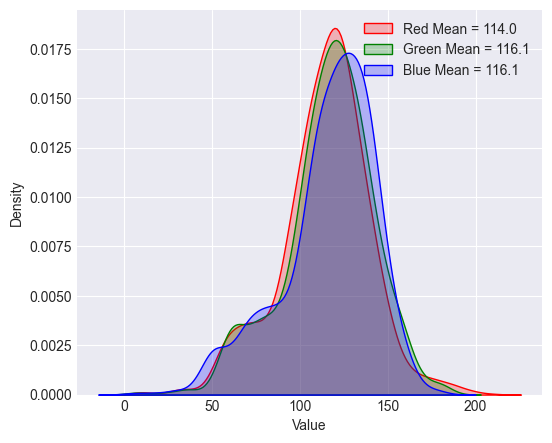

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plt.rcParams['lines.linewidth'] = 0.5

sns.kdeplot(color_df['r_mean'], color='r', fill=True, label=f'Red Mean = {np.mean(color_df.r_mean):.1f}')
sns.kdeplot(color_df['g_mean'], color='g', fill=True, label=f'Green Mean = {np.mean(color_df.g_mean):.1f}')
sns.kdeplot(color_df['b_mean'], color='b', fill=True, label=f'Blue Mean = {np.mean(color_df.b_mean):.1f}')

plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

In [53]:
color_df.describe()

,r_mean,g_mean,b_mean
count,2704.000000,2704.000000,2704.000000
mean,114.017264,116.086334,116.120868
std,25.944798,25.901290,26.927142
min,6.977669,3.108698,1.699874
25%,100.797204,103.228066,103.860173
50%,116.513661,118.682654,120.843902
75%,129.896098,132.882350,135.030508
max,209.781450,186.924690,183.311447


In [62]:
stat, p = shapiro(color_df)
print(f"Shapiro-Wilk score: {stat}, p-value: {p}")

Shapiro-Wilk score: 0.9743915796279907, p-value: 1.0056854244259842e-35


Jak widać na powyższym wykresie i statystykach, rozkład kolorów jest podobny oraz w miarę zrównoważony. Widać także, że średnia kolorów jest raczej poniżej spodziewanej średniej standardowego rozkładu kolorów (średnia 128). Natomiast test Shapiro-Wilka na normalizację wskazuje wysoki wynik z niezwykle niskim p-value, co oznacza, że wynik ma bardzo niskie prawdopodobieństwo bycia przypadkiem. Zatem można obyć się bez normalizacji.

## Podsumowanie sekcji
- 21 klas
- zbiór posiada 2704 obrazy
- istnieje wiele unikalnych wartości wysokości i szerokości obrazów, natomiast wartość kanałów jest jedna: 3 (RGB).
- unikalnych kombinacji tych trzech parametrów jest 270.  
- najpopularniejsza z nich (640x360 i odwrotnie) to około 66% całego zbioru. podczas transformacji warto będzie się przyglądnąć temu rozkładowi.

Oznacza to, że model albo musi być uniwersalny w przyjmowaniu rozmiarów wejściowych, albo obrazy należy zmodyfikować (a tym samym zmienić proporcje z np. 16:9 -> 1:1 {ustalona wielkość})  
Jedyne dane jakie posiadamy w tej chwili to dane zdjęcia, czyli zmienne traktowane ilościowo.  
  
Przeglądając te zdjęcia można zauważyć, że są one prawdopodobnie wyłącznie w jednym kraju, zapewne Azjatyckim. (Mój typ: Indie lub Tajlandia).

Rozkład kolorów na zdjęciu jest zrównoważony i bardzo zbliżony do rozkładu normalnego, jak to ukazazał nam test Shapiro-Wilka (0.97 z p-value 10^(-35)), zatem nie jest konieczna normalizacja.